In [1]:
"""
What? The Iris data set

https://machinelearningmastery.com/machine-learning-in-python-step-by-step/
"""

'\nWhat? The Iris data set\n\nDate: 24/11/20\nReference: Machine learning master with python, Jason Brownlee\n'

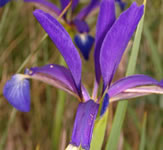

In [2]:
# Import python modules
from pylab import rcParams
from sklearn.svm import SVC
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import KFold
from pandas.plotting import scatter_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from IPython.display import Markdown, display
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [4]:
"""
Classification of iris flowers

[1] Attributes are numeric so you have to figure out how to load and handle data.
[2] It is a classification problem, allowing you to practice with an easier type of supervised
learning algorithm.
[3] It is a multiclass classification problem (multi-nominal) that may require some specialized handling.
[4] It only has 4 attributes and 150 rows, meaning it is small and easily fits into memory (and a screen 
    or single sheet of paper).
[5] All of the numeric attributes are in the same units and the same scale not requiring any special 
    scaling or transforms to get started
"""

# Load dataset
print("Load IRIS dataset")
filename = '../DATASETS/iris.data.csv'
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class'] 
dataset = read_csv(filename, names=names)



<span style='color:blue'>**Load IRIS dataset**</span>

In [5]:
print("Summarise dataset")
print("Dimensions: ", dataset.shape)

print("\nGeneral description\n", dataset.describe())

print("\nFirst 3 matrix entries")
print(dataset.head(3))

print("\nClass distribution:\n",dataset.groupby('class').size())

<span style='color:blue'>**Summarise dataset**</span>

Dimensions:  (150, 5)

General description
        sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

First 3 matrix entries
   sepal-length  sepal-width  petal-length  petal-width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa

Class distribution:
 class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


<span style='color:blue'>**Data visualisation**</span>

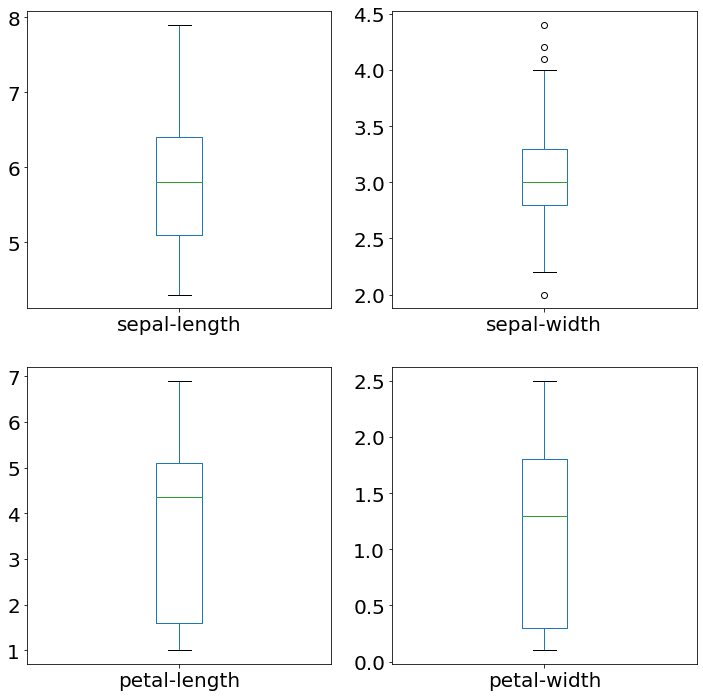

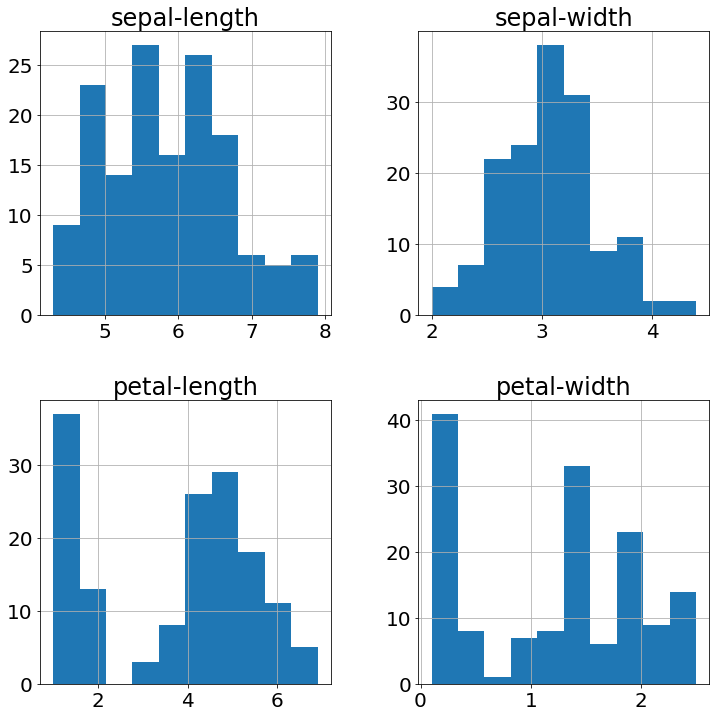

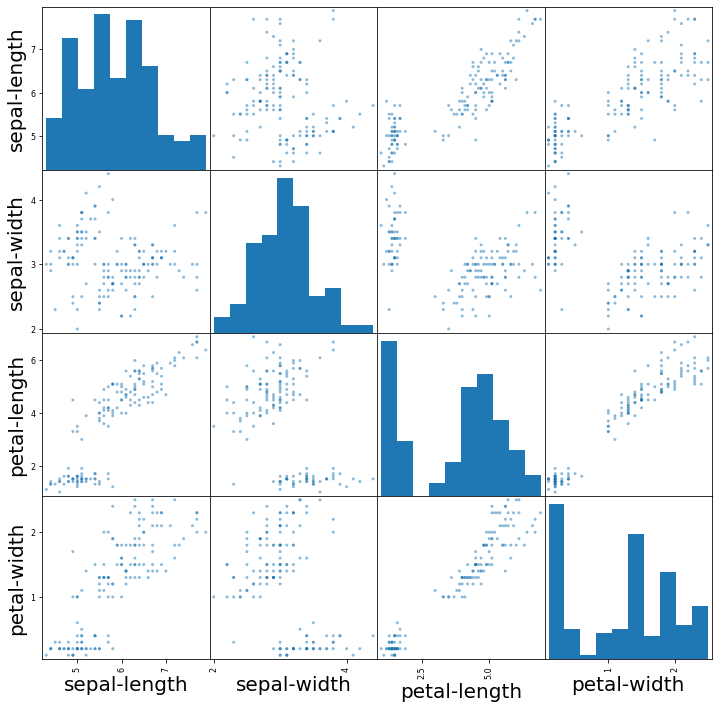

In [6]:
myPrint("Data visualisation")

rcParams['font.size'] = 20
rcParams['figure.figsize'] = 12, 12

# Box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False) 
pyplot.show()

# Histograms
dataset.hist()
pyplot.show()

# Scatter plot matrix
scatter_matrix(dataset)
pyplot.show()

In [7]:
myPrint("Split your data")
# Split-out validation dataset
array = dataset.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

print("Size of training data: ", X_train.shape)
print("Size of validation data: ", X_validation.shape)

<span style='color:blue'>**Split your data**</span>

Size of training data:  (120, 4)
Size of validation data:  (30, 4)


<span style='color:blue'>**Quickly evaluate different models**</span>

LR: 0.983333 (0.033333)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
CART: 0.958333 (0.076830)
NB: 0.966667 (0.040825)
SVM: 0.983333 (0.033333)


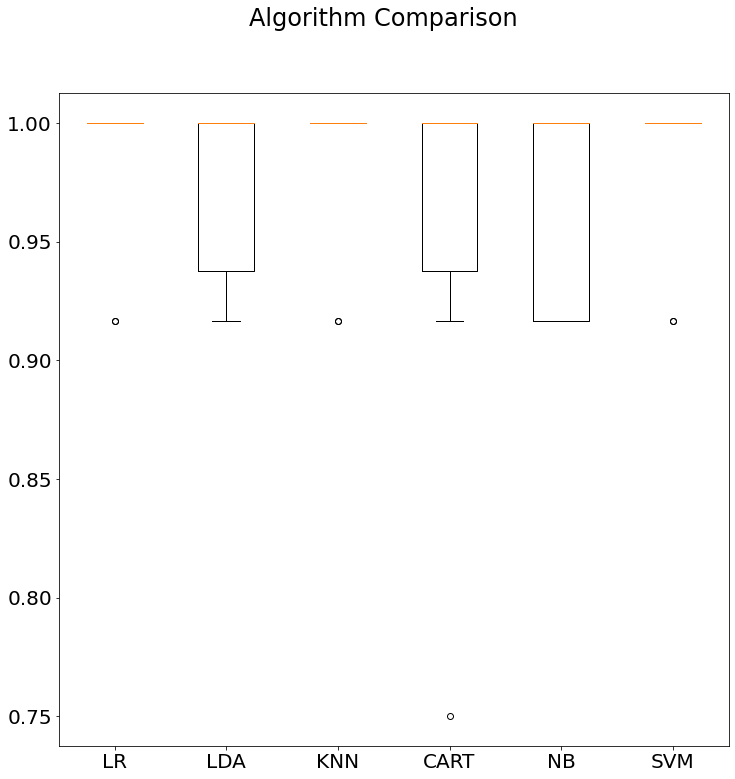

In [8]:
myPrint("Quickly evaluate different models")

"""
Let’s evaluate 6 different algorithm:

Linear models
[1] Logistic Regression (LR)
[2] Linear Discriminant Analysis (LDA)
Nonlinear models
[3] k-Nearest Neighbors (KNN)
[4] Classification and Regression Trees (CART)
[5] Gaussian Naive Bayes (NB)
[6] Support Vector Machines (SVM)


We will use 10-fold cross validation to estimate accuracy. 
This will split our dataset into 10 parts, train on 9 and 
test on 1 and repeat for all combinations of train-test splits. 
We are using the metric of accuracy to evaluate models. 
This is a ratio of the number of correctly predicted 
instances divided by the total number of instances in the dataset
multiplied by 100 to give a percentage (e.g. 95% accurate). We 
will be using the scoring variable when we run build and evaluate
each model next
"""

# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression(max_iter = 250))) 
models.append(('LDA', LinearDiscriminantAnalysis())) 
models.append(('KNN', KNeighborsClassifier())) 
models.append(('CART', DecisionTreeClassifier())) 
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, shuffle = True, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv = kfold, scoring = 'accuracy') 
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
# Compare Algorithms
fig = pyplot.figure() 
fig.suptitle('Algorithm Comparison') 
ax = fig.add_subplot(111) 
pyplot.boxplot(results) 
ax.set_xticklabels(names)
pyplot.show()    

In [10]:
myPrint("Make prediction")

"""
The KNN algorithm was the most accurate model that we tested. Now we want to get an 
idea of the accuracy of the model on our validation dataset. This will give us an 
independent final check on the accuracy of the best model.
"""

# Make predictions on validation dataset
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print("Model accuracy: ", accuracy_score(Y_validation, predictions))
print("\nConfusio matrix \n'", confusion_matrix(Y_validation, predictions))
print("\nClassification report:\n", classification_report(Y_validation, predictions))

<span style='color:blue'>**Make prediction**</span>

Model accuracy:  0.9

Confusio matrix 
' [[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]

Classification report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

       accuracy                           0.90        30
      macro avg       0.92      0.91      0.91        30
   weighted avg       0.90      0.90      0.90        30

